In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection                import train_test_split

import tensorflow
from tensorflow                             import data
from tensorflow                             import keras
from tensorflow.keras.preprocessing         import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image   import load_img,img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.layers                import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
from tensorflow.keras.applications          import VGG16, MobileNet
from tensorflow.keras.callbacks             import EarlyStopping

In [2]:
train_data = image_dataset_from_directory(
    directory='output/train',
    labels='inferred',
    label_mode='categorical',
    # Use 20% data as testing data.
    #validation_split=0.2,
    #subset="training",
    # Set seed to ensure the same split when loading testing data.
    seed=123,
    batch_size=32,
    image_size=(128, 128),
)

val_ds = image_dataset_from_directory(
    directory='output/val',
    labels='inferred',
    label_mode='categorical',
    #validation_split=0.2,
    #subset="validation",
    seed=123,
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

test_data = image_dataset_from_directory(
    directory='output/val',
    labels='inferred',
    label_mode='categorical',
    seed=123,
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

Found 59324 files belonging to 62 classes.
Found 7387 files belonging to 62 classes.
Found 7387 files belonging to 62 classes.


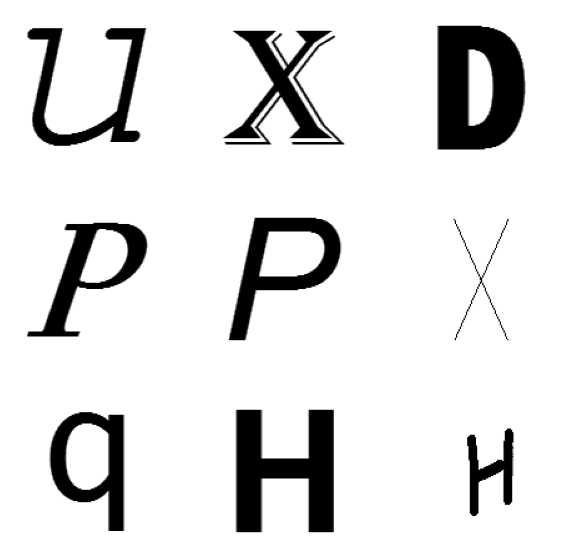

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [4]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [5]:
Initial_NN = Sequential()

Initial_NN.add(InputLayer(input_shape=(128,128,3)))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
Initial_NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
Initial_NN.add(MaxPooling2D())

# Conv block 2 - note we increase filter dimension as we move
# further into the network. You can add more conv steps to
# each block to increase model capacity.
Initial_NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
Initial_NN.add(MaxPooling2D())

# Conv block 3 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
Initial_NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
Initial_NN.add(MaxPooling2D())
Initial_NN.add(Dense(62, activation='relu'))

# Conv block 4 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
Initial_NN.add(Conv2D(filters=40, kernel_size=3, activation='relu', padding='same'))
Initial_NN.add(MaxPooling2D())
Initial_NN.add(Dense(62, activation='relu'))

Initial_NN.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
Initial_NN.add(Dense(62, activation='relu'))
Initial_NN.add(Dense(62, activation='softmax'))  # 10 target classes

Initial_NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', tensorflow.keras.metrics.CategoricalAccuracy()],
)
Initial_NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 30)        5430      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
dense (Dense)                (None, 16, 16, 62)        1

In [6]:
History_Nn = Initial_NN.fit_generator(train_data, epochs=20, validation_data=val_ds, callbacks=[early_stopping])  # track progress as we fit)


Epoch 1/20


/Users/waltertyrna/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1854/1854 [==============================] - 322s 173ms/step - loss: 3.3231 - accuracy: 0.1918 - categorical_accuracy: 0.1918 - val_loss: 1.2542 - val_accuracy: 0.6594 - val_categorical_accuracy: 0.6594
Epoch 2/20
1854/1854 [==============================] - 825s 445ms/step - loss: 1.2039 - accuracy: 0.6600 - categorical_accuracy: 0.6600 - val_loss: 0.9639 - val_accuracy: 0.7217 - val_categorical_accuracy: 0.7217
Epoch 3/20
1854/1854 [==============================] - 320s 173ms/step - loss: 0.9441 - accuracy: 0.7223 - categorical_accuracy: 0.7223 - val_loss: 0.8654 - val_accuracy: 0.7444 - val_categorical_accuracy: 0.7444
Epoch 4/20
1854/1854 [==============================] - 318s 171ms/step - loss: 0.8123 - accuracy: 0.7493 - categorical_accuracy: 0.7493 - val_loss: 0.7422 - val_accuracy: 0.7779 - val_categorical_accuracy: 0.7779
Epoch 5/20
1854/1854 [==============================] - 320s 172ms/step - loss: 0.7162 - accuracy: 0.7746 - categorical_accuracy: 0.7746 - val_loss: 0.6792

In [7]:
NNscore = Initial_NN.evaluate(test_data)


231/231 [==============================] - 17s 72ms/step - loss: 0.6485 - accuracy: 0.7814 - categorical_accuracy: 0.7814


In [8]:
print(f'Test loss: {NNscore[0]} / Test accuracy: {NNscore[1]}')

Test loss: 0.6485428810119629 / Test accuracy: 0.7813726663589478


In [9]:
Initial_NN.save("Initial_NN_model_2Dec-2")


INFO:tensorflow:Assets written to: Initial_NN_model_2Dec-2/assets


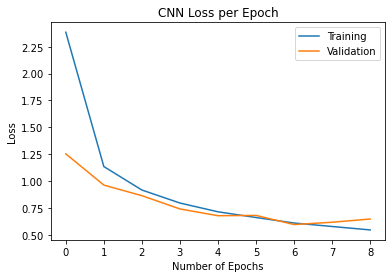

<Figure size 432x288 with 0 Axes>

In [10]:
# summarize history for accuracy
plt.plot(History_Nn.history['loss'])
plt.plot(History_Nn.history['val_loss'])
plt.title('CNN Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
plt.savefig('cnn_model_loss.png')


In [11]:
# note we exclude the final dense layers by setting include_top=False,
# and add new ones to train from scratch below

Mobile_Net = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(128,128,3))
 
# Freeze convolutional layers
for layer in Mobile_Net.layers:
    layer.trainable = False    

In [12]:
Transfer_Plus = Sequential()

Transfer_Plus.add(Mobile_Net)

Transfer_Plus.add(InputLayer(input_shape=(128,128,3)))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
Transfer_Plus.add(Dense(512, activation='relu', input_shape=(128,128,3)))
#Transfer_Plus.add(MaxPooling2D((2,2), padding='same'))

# Conv block 2 - note we increase filter dimension as we move
# further into the network. You can add more conv steps to
# each block to increase model capacity.
Transfer_Plus.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
#Transfer_Plus.add(MaxPooling2D())

# Conv block 3 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
Transfer_Plus.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
Transfer_Plus.add(Dense(62, activation='relu'))
#Transfer_Plus.add(MaxPooling2D())

# Conv block 4 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
Transfer_Plus.add(Conv2D(filters=40, kernel_size=3, activation='relu', padding='same'))
Transfer_Plus.add(Dense(62, activation='relu'))
#Transfer_Plus.add(MaxPooling2D())

Transfer_Plus.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
Transfer_Plus.add(Dense(62, activation='relu'))
Transfer_Plus.add(Dense(62, activation='softmax'))  # 10 target classes

# define formal model object to train and compile it as usual

Transfer_Plus.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tensorflow.keras.metrics.CategoricalAccuracy()])
Transfer_Plus.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
input_3 (InputLayer)         multiple                  0         
_________________________________________________________________
dense_4 (Dense)              (None, 4, 4, 512)         524800    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 20)          92180     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 30)          5430      
_________________________________________________________________
dense_5 (Dense)              (None, 4, 4, 62)          1922      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 40)         

In [13]:
history_TP = Transfer_Plus.fit_generator(train_data, epochs=20, validation_data=val_ds, callbacks=[early_stopping])


Epoch 1/20


/Users/waltertyrna/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1854/1854 [==============================] - 431s 232ms/step - loss: 2.5381 - accuracy: 0.3192 - categorical_accuracy: 0.3192 - val_loss: 0.8716 - val_accuracy: 0.7214 - val_categorical_accuracy: 0.7214
Epoch 2/20
1854/1854 [==============================] - 442s 238ms/step - loss: 0.8059 - accuracy: 0.7378 - categorical_accuracy: 0.7378 - val_loss: 0.7279 - val_accuracy: 0.7655 - val_categorical_accuracy: 0.7655
Epoch 3/20
1854/1854 [==============================] - 477s 257ms/step - loss: 0.6200 - accuracy: 0.7908 - categorical_accuracy: 0.7908 - val_loss: 0.7114 - val_accuracy: 0.7768 - val_categorical_accuracy: 0.7768
Epoch 4/20
1854/1854 [==============================] - 685s 370ms/step - loss: 0.5147 - accuracy: 0.8275 - categorical_accuracy: 0.8275 - val_loss: 0.6685 - val_accuracy: 0.7949 - val_categorical_accuracy: 0.7949
Epoch 5/20
1854/1854 [==============================] - 415s 224ms/step - loss: 0.4408 - accuracy: 0.8468 - categorical_accuracy: 0.8468 - val_loss: 0.6603

In [14]:
TPscore = Transfer_Plus.evaluate(test_data)
print(f'Test loss: {TPscore[0]} / Test accuracy: {TPscore[1]}')

231/231 [==============================] - 43s 185ms/step - loss: 0.6620 - accuracy: 0.8102 - categorical_accuracy: 0.8102
Test loss: 0.6619886159896851 / Test accuracy: 0.8102071285247803


In [15]:
Transfer_Plus.save("Transfer_Plus_model_2Dec-2")


INFO:tensorflow:Assets written to: Transfer_Plus_model_2Dec-2/assets


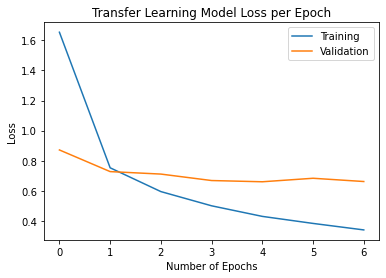

<Figure size 432x288 with 0 Axes>

In [16]:
# summarize history for accuracy
plt.plot(history_TP.history['loss'])
plt.plot(history_TP.history['val_loss'])
plt.title('Transfer Learning Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
plt.savefig('transfer_model_loss.png')


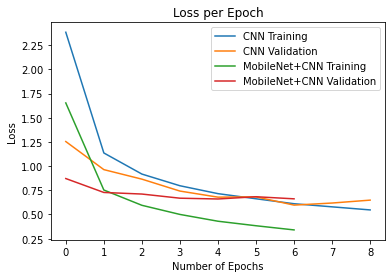

<Figure size 432x288 with 0 Axes>

In [28]:
# summarize history for accuracy
plt.plot(History_Nn.history['loss'])
plt.plot(History_Nn.history['val_loss'])
plt.plot(history_TP.history['loss'])
plt.plot(history_TP.history['val_loss'])
plt.title('Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['CNN Training', 'CNN Validation', 'MobileNet+CNN Training', 'MobileNet+CNN Validation'], loc='upper right')
plt.show()
plt.savefig('cnn_model_loss.png')


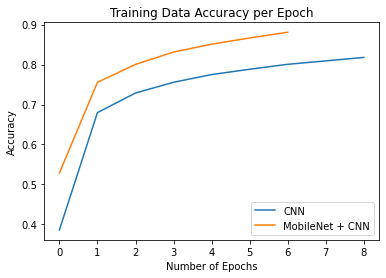

In [18]:
# summarize history for accuracy
plt.plot(History_Nn.history['accuracy'])
plt.plot(history_TP.history['accuracy'])
plt.title('Training Data Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['CNN', 'MobileNet + CNN'], loc='lower right')
plt.show()

In [29]:
import visualkeras

Initial_NN


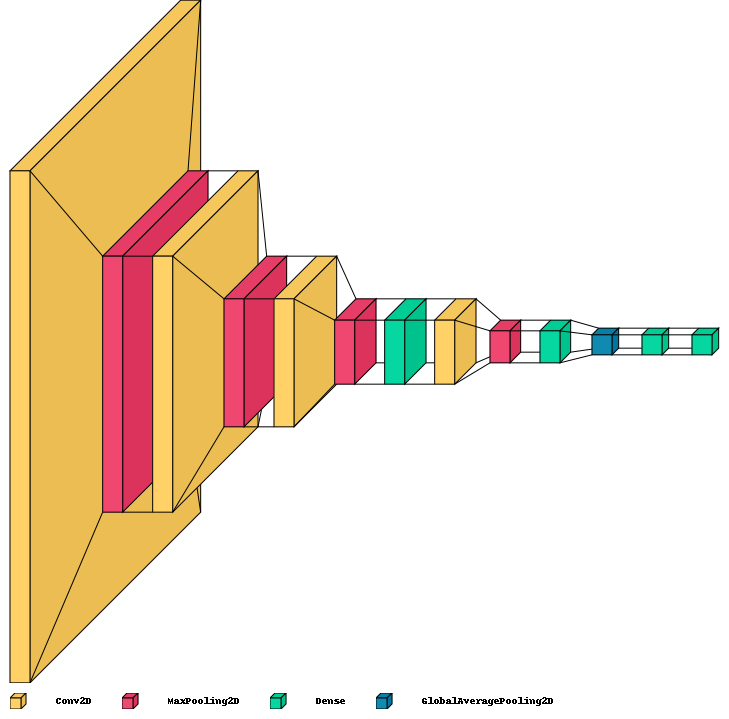

In [30]:
from PIL import ImageFont

#font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(Initial_NN, legend=True, spacing=30)  # font is optional!

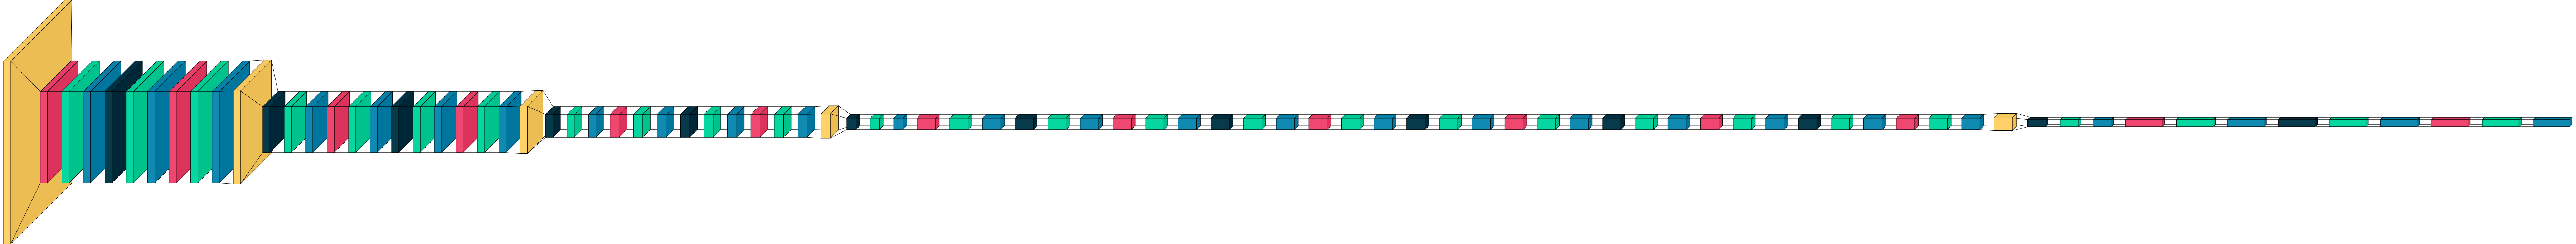

In [31]:
model.add(visualkeras.SpacingDummyLayer(spacing=1000))
visualkeras.layered_view(Mobile_Net, spacing=40)
#visualkeras.layered_view(model, draw_volume=False,legend=True)
